# Final Evaluation

In [5]:
import warnings
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
test_df = pd.read_csv('../data/processed/test_data.csv')

In [ ]:
import pickle
with open("../saved_model/classifier/xgboost.pkl", "rb") as file:
    clf = pickle.load(file)

In [8]:
drop_col = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 
'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'unix_time', 
'job_category', 'trans_date', 'trans_num', 'is_fraud']
input_features = [col for col in test_df.columns if col not in drop_col]
target_feature = ['is_fraud']

In [ ]:
predictions_test = clf.predict_proba(test_df[input_features])[:, 1]  

In [ ]:
test_df['predictions']=(predictions_test>0.2).round() # threshold = 0.25 for stricter non-fradulent activaities

In [41]:
from models.tree_based import performance_assessment
performance_assessment(test_df)

,auc_roc,average precision,f1 score,precision_top_50
0,0.938,0.751,0.867,0.194


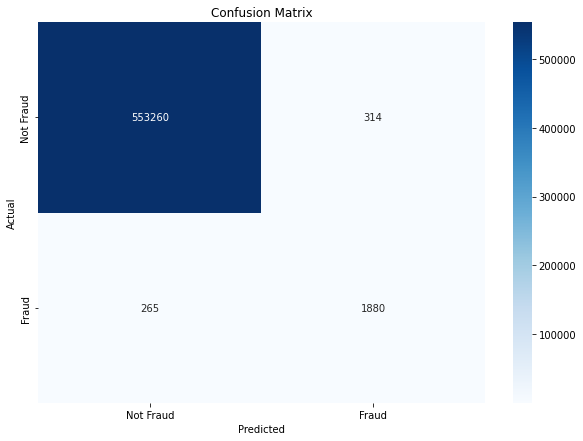

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(test_df['is_fraud'], test_df['predictions'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()